In [ ]:
from fastai.vision.all import *
from moving_mnist.models.conv_rnn import *
from moving_mnist.data import *

In [ ]:
if torch.cuda.is_available():
    torch.cuda.set_device(0)
    print(torch.cuda.get_device_name())

Quadro RTX 8000


# Moving MNIST forecasting

> A little experiment using Convolutional RNNs to forecast moving MNIST digits.

## Install

It only uses fastai (version 2) as dependency. Check how to install at https://github.com/fastai/fastai2

## Example:

We wil predict:
- `n_in`: 5 images
- `n_out`: 5 images  
- `n_obj`: 3 objects

In [ ]:
ds = MovingMNIST(DATA_PATH, n_in=5, n_out=5, n_obj=[1,2,3])

In [ ]:
train_tl = TfmdLists(range(500), ImageTupleTransform(ds))
valid_tl = TfmdLists(range(100), ImageTupleTransform(ds))

In [ ]:
dls = DataLoaders.from_dsets(train_tl, valid_tl, bs=8,
                             after_batch=[Normalize.from_stats(*mnist_stats)]).cuda()

Left: Input, Right: Target

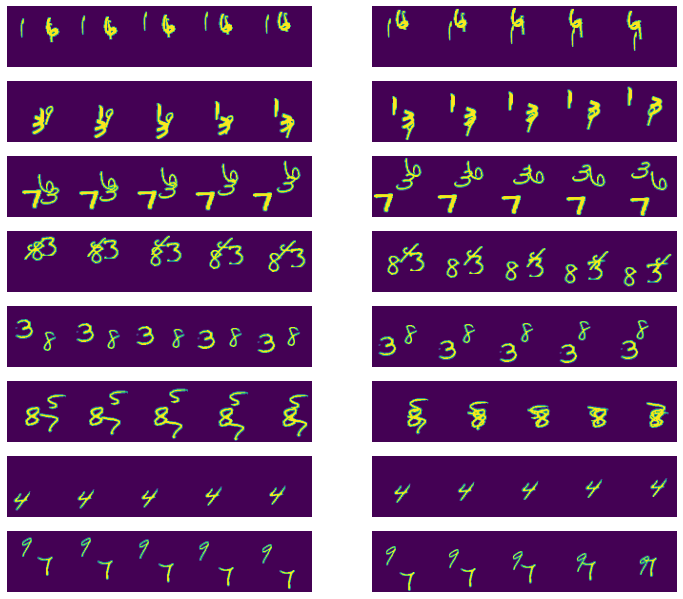

In [ ]:
dls.show_batch()

`StackUnstack` takes cares of stacking the list of images into a fat tensor, and unstacking them at the end, we will need to modify our loss function to take a list of tensors as input and target.

In [ ]:
model = StackUnstack(SimpleModel())

As the `ImageSeq` is a `tuple` of images, we will need to stack them to compute loss.

In [ ]:
loss_func = StackLoss(MSELossFlat())

In [ ]:
learn = Learner(dls, model, loss_func=loss_func, cbs=[])

SuggestedLRs(lr_min=0.005754399299621582, lr_steep=3.0199516913853586e-05)

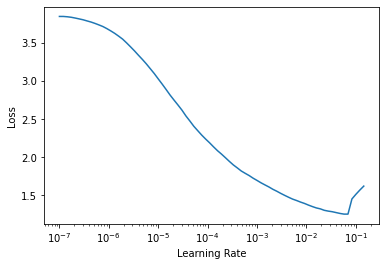

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(4, 1e-4)

epoch,train_loss,valid_loss,time
0,0.915238,0.619522,00:12
1,0.669368,0.608123,00:12
2,0.570026,0.559723,00:12
3,0.528593,0.532774,00:12


In [ ]:
p,t = learn.get_preds()

As you can see, the results is a list of 5 tensors with 100 samples each.

In [ ]:
len(p), p[0].shape

(5, torch.Size([100, 1, 64, 64]))

In [ ]:
def show_res(t, idx):
    im_seq = ImageSeq.create([t[i][idx] for i in range(5)])
    im_seq.show(figsize=(8,4));

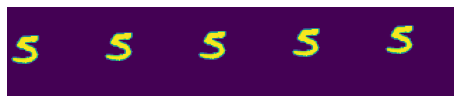

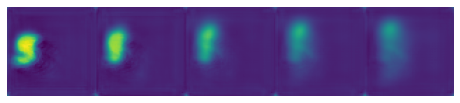

In [ ]:
k = random.randint(0,100)
show_res(t,k)
show_res(p,k)

## Training Example:
- ConvGRU with attention and blur upsampling: [01_train_example.ipynb](01_train_example.ipynb)
- ConvGRU trained with Cross Entropy instead of MSE: [02_train_cross_entropy.ipynb](02_train_cross_entropy.ipynb)
- Seq2seq model trianed with MSE [03_trainseq2seq.ipynb](03_trainseq2seq.ipynb)
- PhyDNet ported to fastai[04_train_phydnet.ipynb](04_train_phydnet.ipynb)